In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
from globalVars import DATASET_DIRECTORY, IMAGE_SIZE, BATCH_SIZE, TRAINING_SIZE, SEED, SHUFFLE_SIZE, FILTERS_NUMBER, FILTER_SIZE, INPUT_SHAPE, POOLING_SIZE, EPOCHS

In [3]:
from helpers import split_data_set

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_DIRECTORY,
    shuffle =True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
n_classes = len(class_names)
n_classes

3

In [7]:
len(dataset) # Number of batches

68

In [8]:
for image_batch, label_batch in dataset.take(5): # The images inside tha batch (32) and the label (0 or 1 or 2) from the batches from first batch to batch no.5
    print(image_batch.shape)
    print(f"{label_batch.numpy()}")

(32, 256, 256, 3)
[0 1 1 0 1 0 1 1 1 0 2 0 0 2 0 0 0 1 1 0 0 1 0 1 1 0 1 0 2 1 2 1]
(32, 256, 256, 3)
[2 0 0 0 1 0 0 1 0 1 1 2 1 1 0 0 1 0 0 1 1 2 1 2 0 0 0 0 1 0 0 1]
(32, 256, 256, 3)
[0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 2]
(32, 256, 256, 3)
[1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1]
(32, 256, 256, 3)
[2 0 1 0 1 0 0 1 0 0 2 0 0 0 2 1 1 0 1 1 2 1 1 0 1 0 0 1 0 0 0 1]


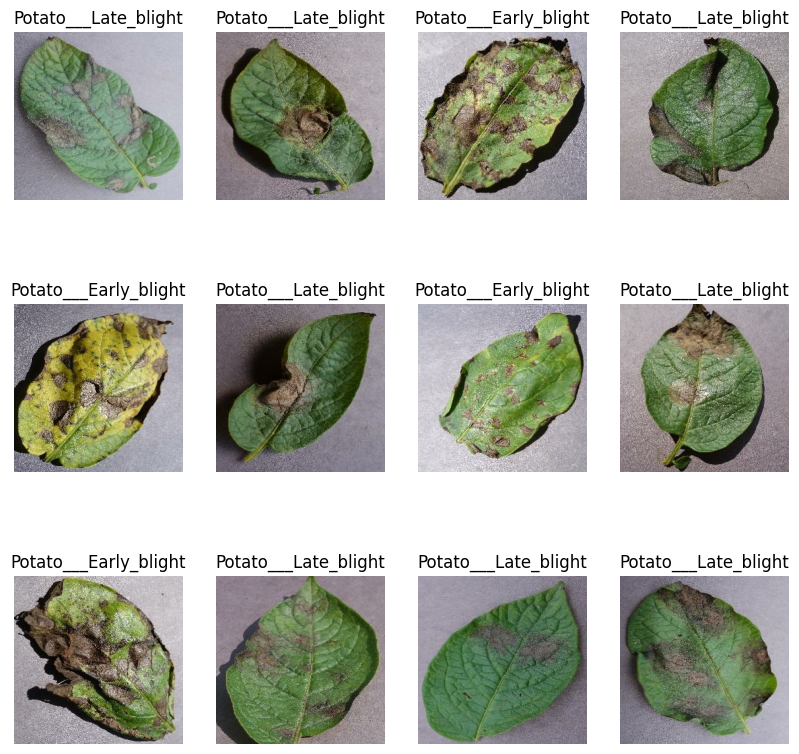

In [9]:
plt.figure(figsize=(10, 10))

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1) # number of rows, number of columns, the position of the image
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

<h1>Split data</h1>
<h4 style="margin-bottom: 8px;">we will split the dataset to:</h4>
<p style="margin: 0;">80% ==> training</p>
<p style="margin: 0;">20% ==> 10% validation, 10% test</p>

In [10]:
training_ds, validation_ds, testing_ds = split_data_set(dataset, TRAINING_SIZE, 0.1, True, SHUFFLE_SIZE, SEED)

In [11]:
len(training_ds)

54

In [12]:
len(validation_ds)

6

In [13]:
len(testing_ds)

8

In [14]:
training_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
testing_ds = testing_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

<h1>Pre-processing</h1>

In [15]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE), # change the dimensions to IMAGE_SIZE * IMAGE_SIZE
    layers.Rescaling(1.0/255) # change the value of the pixel color to be between [0, 1]
])

<h1>Data Augmentation</h1>

In [16]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"), 
    layers.RandomRotation(0.2) 
])

<h1>Model</h1>

In [17]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(FILTERS_NUMBER, FILTER_SIZE, activation="relu", input_shape = INPUT_SHAPE),
    layers.MaxPooling2D(POOLING_SIZE),
    layers.Conv2D(FILTERS_NUMBER * 2, FILTER_SIZE, activation="relu"),
    layers.MaxPooling2D(POOLING_SIZE),
    layers.Conv2D(FILTERS_NUMBER * 2, FILTER_SIZE, activation="relu"),
    layers.MaxPooling2D(POOLING_SIZE),
    layers.Conv2D(FILTERS_NUMBER * 2, FILTER_SIZE, activation="relu"),
    layers.MaxPooling2D(POOLING_SIZE),
    layers.Conv2D(FILTERS_NUMBER * 2, FILTER_SIZE, activation="relu"),
    layers.MaxPooling2D(POOLING_SIZE),
    layers.Conv2D(FILTERS_NUMBER * 2, FILTER_SIZE, activation="relu"),
    layers.MaxPooling2D(POOLING_SIZE),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax")
])

model.build(input_shape=INPUT_SHAPE)

c:\Users\baael\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

<h1>Training</h1>

In [20]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [21]:
history = model.fit(
    training_ds,
    epochs=EPOCHS,
    verbose=1, # Appear training details (accuracy, loss)
    validation_data=validation_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 48s 792ms/step - accuracy: 0.4366 - loss: 0.9417 - val_accuracy: 0.5365 - val_loss: 0.8873
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 579ms/step - accuracy: 0.5548 - loss: 0.8278 - val_accuracy: 0.6354 - val_loss: 0.7026
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 576ms/step - accuracy: 0.7606 - loss: 0.5652 - val_accuracy: 0.8646 - val_loss: 0.3628
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 635ms/step - accuracy: 0.8383 - loss: 0.3649 - val_accuracy: 0.8802 - val_loss: 0.2989
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 645ms/step - accuracy: 0.8901 - loss: 0.2646 - val_accuracy: 0.9115 - val_loss: 0.2285
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 637ms/step - accuracy: 0.9024 - loss: 0.2382 - val_accuracy: 0.9062 - val_loss: 0.2321
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 659ms/step - accuracy: 0.9256 - loss: 0.2184 - val_accuracy: 0.8906 - val_loss: 0.2253
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 652ms/step - accuracy: 0.9249 - loss: 0.1749 - val_accu

<h1>Testing</h1>

In [22]:
scores = model.evaluate(testing_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.9922 - loss: 0.0648


In [ ]:
scores # [lose, accuracy]

[0.05007673799991608, 0.9921875]